# Chapter 1-introduce

In [8]:
from numpy import*
#random.rand(4,4)
randmat=mat(random.rand(4,4))
invRandMat=randmat.I
print(randmat*invRandMat)

[[  1.00000000e+00   0.00000000e+00  -4.44089210e-16   2.22044605e-16]
 [  1.11022302e-16   1.00000000e+00   0.00000000e+00   4.44089210e-16]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   4.44089210e-16   1.00000000e+00]]


# Chpter 2-KNN

## knn-Classifying with k-Nearest Neighbors

percentage of time spent playing video games? 0.001
frequent flier miles earned per year?  0.001
liters of ice cream consumed per year? 0.001
{'2': 1}
{'2': 2}
{'2': 3}
You will probably like this person:  in small doses


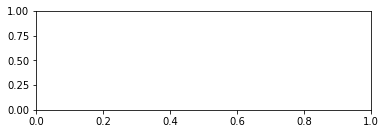

In [3]:
from numpy import *
import operator
import matplotlib.pyplot as plt

#define function to generate labels and group
def createDataSet():
    group=array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group,labels

#define function to classify the object
def classify0(inX,dataSet,labels,k):
    #Distance calculation
    dataSetSize=dataSet.shape[0] # get the rows of data
    diffMat=tile(inX,(dataSetSize,1))-dataSet  # extend the data to the same rows of data  and compute the cost function
    sqDiffMat=diffMat**2
    sqDistances=sqDiffMat.sum(axis=1)# to sum by the row
    distances=sqDistances**0.5
    sortedDistIndicies=distances.argsort() # important how to use argsort to return the index of elements(from small to bigger)
    #print(len(sortedDistIndicies))
    #print("the k is %s"%k)
    #print("the labels is %s" %labels)
    #Voting with lowest  k distances 
    #count the lowest k distances
    classCount={}
    for i in range(k):
        voteIlabel=labels[sortedDistIndicies[i]]
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
        print(classCount)
        
    #Sort dictionary
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)# reverse is true to oreder by desc 
    return sortedClassCount[0][0]

    
    
#define functrion to parse files
def file2matrix(filename,dim2):
    fr=open(filename)
    #Get number of lines in file
    numberOfLines=len(fr.readlines())
    #Create NumPy  matrix to return
    returnMat=zeros((numberOfLines,dim2))
    classLabelVector=[]
    fr=open(filename)
    index=0
    #Parse line to a list
    for line in fr.readlines():
        line=line.strip()
        listFromLine=line.split('\t')
        returnMat[index,:]=listFromLine[0:dim2]
        classLabelVector.append(str(listFromLine[-1]))
        index+=1
       # if index==1:
      #      print(listFromLine)
    return returnMat,classLabelVector
    
    
#define function to normalize the data
def autoNorm(dataSet):
    minVals=dataSet.min(0)
    maxVals=dataSet.max(0)
    ranges=maxVals-minVals
    normDataSet=zeros(shape(dataSet))
    m=dataSet.shape[0]
    normDataSet=dataSet-tile(minVals,(m,1))
    normDataSet=normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

#Classifier testing code for dating site

def datingClassTest():
    hoRatio=0.20
    datingDataMat,datingLabels=file2matrix('data/datingTestSet2.txt',3)
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    print(m)
    numTestVecs=int(m*hoRatio)
    print(numTestVecs)
    errorCount=0.0
    datingLabels=array(datingLabels)
    #print(datingLabels)##add to test the performance
    datingLabels=datingLabels.astype('float64')
    for i in range(numTestVecs):
        classifierResult=classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        #print(classifierResult)
        print("the classifier came back with:%d,the real anser is:%d"%(classifierResult,datingLabels[i]))
        if (classifierResult!=datingLabels[i]):
            errorCount+=1.0
        print("the total error rate is:%f"%(errorCount/float(numTestVecs)))
        
        
        
#Dating site predictor function
def classifyPerson():
    resultList=['not at all','in small doses','in large doses']
    percentTats=float(input("percentage of time spent playing video games? "))
    ffMiles=float(input("frequent flier miles earned per year?  "))
    iceCream=float(input("liters of ice cream consumed per year? "))
    datingDataMat,datingLabels=file2matrix('data/datingTestSet2.txt',3)
    #print("the datingLabels is %s"%datingLabels)
    normMat,ranges,minVals=autoNorm(datingDataMat)
    inArr=array([ffMiles,percentTats,iceCream])
    classifierResult=classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    #print(classifierResult)
    print("You will probably like this person: ",resultList[int(classifierResult)-1])
    
    
    

if __name__=="__main__":
    datingDataMat,datingLabels=file2matrix('data/datingTestSet2.txt',3)
    fig=plt.figure()
    ax=fig.add_subplot(211)
    labels=array(datingLabels)
    labels=labels.astype('float64')# to avoid error in scatter
    #datingClassTest()
    classifyPerson()
#    plt.title("Icecreame and videogames")
#    plt.xlabel("Liters of Ice Cream Consumed Per Week")
#    plt.ylabel("Percentage of Time Spent Playing Video Games")
#    ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*labels,15.0*labels)
 
    
 #   ax=fig.add_subplot(2,2,2)
#    plt.title("Icecreame and videogames")
#    plt.xlabel("Percentage of Time Spent Playing Video Games")
#    plt.ylabel("frequent fLYIER miles Earned Per Year")
#    ax.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*labels,15.0*labels)
#   plt.show()



# Chapter 3
## Decision tree

In [37]:
from math import log

def calcShannonEnt(dataSet):
    numEntries=len(dataSet)
    labelCounts={}
    for featVec in dataSet:  #for each element in the dataSet,choose the last value 
        currentLabel=featVec[-1]  
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
            labelCounts[currentLabel]+=1
    shannonEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries
        shannonEnt-=prob*log(prob,2)
    return shannonEnt

def createDataSet():
    dataSet=[['1','1','yes'],['1','1','yes'],['1','0','no'],['0','1','no'],['0','1','no']]
    labels=['no surfacing','flippers']
    return dataSet,labels

def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet


def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1
    baseEntrop=calcShannonEnt(dataSet)
    bestInfoGain=0.0;bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]
        uniqueVals=set(featList)
        newEntrop=0.0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/float(len(dataSet))
            newEntrop+=prob*calcShannonEnt(subDataSet)
        infoGain=baseEntrop-newEntrop
        if (infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i  ####?????????
    return bestFeature



def majorityCnt(classlist):
    calssCount{}
    for vote in classList:
        if vote not in calssCount.keys()
        clasCount[vote]+=1
    sortedClassCount=sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]


def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet)
    bestFeatLable=labels[bestFeat]
    del(labels[bestFeat])
    featValues=[example[bestFeature] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTress[bestFeatLabel][value]=createTree(splitDataSet\
                                                 (dataSet,bestFeat,value),subLabels)
    return myTress

    
            
if __name__=="__main__":
    myDat,labels=createDataSet()
    print(myDat)
    print(calcShannonEnt(myDat))
    print(chooseBestFeatureToSplit(myDat))

SyntaxError: invalid syntax (<ipython-input-37-1b2b0279d018>, line 53)

In [5]:
from math import log

def calcShannonEnt(dataSet):
    numEntries=len(dataSet)
    
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1] 
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
            #print(labelCounts[currentLabel])
        labelCounts[currentLabel]+=1
        #print(labelCounts[currentLabel])
    #print(labelCounts)
    shannonEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries
        shannonEnt-=prob*log(prob,2)
    return shannonEnt

def createDataSet():
    dataSet=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    labels=['no surfacing','flippers']
    return dataSet,labels

def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        reducedFeatVec=[]
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            print(reducedFeatVec)
            reducedFeatVec.extend(featVec[axis+1:])
            print("-------")
            print(reducedFeatVec)
            retDataSet.append(reducedFeatVec)
            print("--------")
            print(retDataSet)
    return retDataSet


def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1
    #print(numFeatures)
    baseEntrop=calcShannonEnt(dataSet)
    #print(baseEntrop)
    bestInfoGain=0.0;bestFeature=-1  #why define the bestFeature -1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]
        print(featList)
        uniqueVals=set(featList)
        print(uniqueVals)
        newEntrop=0.0
        #caculate the entrop of the tree
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            print(subDataSet)
            prob=len(subDataSet)/float(len(dataSet))
            print(prob)
            newEntrop+=prob*calcShannonEnt(subDataSet)
            print(newEntrop)
        infoGain=baseEntrop-newEntrop
        print("infoGain: %s"%infoGain)
        if (infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i  ####?????????
    return bestFeature


def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet)
    bestFeatLable=labels[bestFeat]
    del(labels[bestFeat])
    featValues=[example[bestFeature] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTress[bestFeatLabel][value]=createTree(splitDataSet\
                                                 (dataSet,bestFeat,value),subLabels)
    return myTress


if __name__=="__main__":
    mydat,labels=createDataSet()
    #classList=[example[-1] for example in mydat]
    #a=classList.count(classList[0])
    #print(classList)
    #print(a)
    #trees=createTree(mydat,labels)
    #mydat[0][-1]="maybe"
    #print(mydat)
    #ent=calcShannonEnt(mydat)
    #print(ent)
    reDataSet=splitDataSet(mydat,1,1)
    print(mydat)
    print(reDataSet)
    #bFeature=chooseBestFeatureToSplit(mydat)
    #print(bFeature)
    
    
    


[1]
-------
[1, 'yes']
--------
[[1, 'yes']]
[1]
-------
[1, 'yes']
--------
[[1, 'yes'], [1, 'yes']]
[0]
-------
[0, 'no']
--------
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[0]
-------
[0, 'no']
--------
[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]
[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]


In [6]:
import numpy as np
a=[3,4,2]
b=a[:0]
b.extend(a[1:])
#print(a[1:])
print(b)

[4, 2]


In [6]:
a=[['5r678','678','-1'],['987654','6578','-2']]
for c in a:
    b=c[-1]
    print(b)


-1
-2


In [11]:
'''''创建我们所要分类的决策树'''  
def createTree(dataSet,label):      
    classList=[example[-1] for example in dataSet]   #classList是指当前数据集的类别标签  
    if classList.count(classList[0])==len(classList): #计算classList中某个类别标签的数量，若只有一类，则数量与它的数据长度相等  
        return classList[0]  
    if len(dataSet[0])==1:   #当处理完所有特征而类别标签还不唯一时起作用  
        return majorityCnt(classList)  
    featBest=chooseBestFeature(dataSet)  #选择最好的分类特征  
    feature=[example[featBest] for example in dataSet]  #接下来使用该分类特征进行分类  
    featValue=set(feature)  #得到该特征所有的分类值，如'0'和'1'  
    newLabel=label[featBest]  
    del(label[featBest])  
    Tree={newLabel:{}}  #创建一个多重字典，存储决策树分类结果  
    for value in featValue:  
        subLabel=label[:]  
        Tree[newLabel][value]=createTree(spiltData(dataSet,featBest,value),subLabel) #递归函数使得Tree不断创建分支，直到分类结束  
    return Tree  

0
1


In [13]:

'''''使用决策树执行分类，返回分类结果'''  
def classify(tree,label,testVec):       #tree为createTree()函数返回的决策树；label为特征的标签值；testVec为测试数据，即所有特征的具体值构成的向量  
    firstFeat=tree.keys()[0]            #取出tree的第一个键  
    secondDict=tree[firstFeat]          #取出tree第一个键的值，即tree的第二个字典（包含关系）  
    labelIndex=label.index(firstFeat)   #得到第一个特征firstFeat在标签label中的索引  
    for key in secondDict.keys():       #遍历第二个字典的键  
        if testVec[labelIndex]==key:    #如果第一个特征的测试值与第二个字典的键相等时  
            if type(secondDict[key]).__name__=='dict':  #如果第二个字典的值还是一个字典，说明分类还没结束，递归执行classify函数  
                classLabel=classify(secondDict[key],label,testVec)  #递归函数中只有输入的第一个参数不同，不断向字典内层渗入  
            else:  
                classLabel=secondDict[key]  #最后将得到的分类值赋给classLabel输出  

{1, 2, 3, 4}

In [1]:
'''''使用pickle模块存储决策树'''  
def storeTree(tree,filename):    
    import pickle  
    fw=open(filename,'w')  
    pickle.dump(tree,fw)  
    fw.close()  
  
'''''打开文件取出决策树'''  
def loadTree(filename):           
    import pickle  
    fr=open(filename,'r')  
    return pickle.load(fr)  

# chapter  8  prediction numeric values:regression

In [63]:
from numpy import *
import numpy as np

def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []

    fr = open(fileName)
    for line in fr.readlines():
            lineArr =[]
            curLine = line.strip().split('\t')
            for i in range(numFeat):
                lineArr.append(float(curLine[i]))
            dataMat.append(lineArr)
            labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    print(xTx)
    print(linalg.det(xTx).I)
    if linalg.det(xTx) == 0.0:  # 矩阵的行列式等于0说明,矩阵不可逆
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws


In [66]:
# use the price of bosth to do the regression
from sklearn.datasets import load_boston

theta_g = np.array([1., 1., 1., 1.]) #初始化theta
theta_g = theta_g.reshape(4, 1)
alpha = 0.1
temp = theta_g
X0 = X.iloc[:, 0].reshape(150, 1)
X1 = X.iloc[:, 1].reshape(150, 1)
X2 = X.iloc[:, 2].reshape(150, 1)
X3 = X.iloc[:, 3].reshape(150, 1)
J = pd.Series(np.arange(800, dtype = float))
for i in range(800):
# theta j := theta j - alpha*sum((h(xi)-yi)*xi)/m
     temp[0] = theta_g[0] + alpha*np.sum((Y- dot(X, theta_g))*X0)/150.
     temp[1] = theta_g[1] + alpha*np.sum((Y- dot(X, theta_g))*X1)/150.
     temp[2] = theta_g[2] + alpha*np.sum((Y- dot(X, theta_g))*X2)/150.
    temp[3] = theta_g[3] + alpha*np.sum((Y- dot(X, theta_g))*X3)/150.
    J[i] = 0.5*np.sum((Y - dot(X, theta_g))**2) #计算损失函数值    
theta_g = temp #更新theta


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

411856.404013
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
14


/Users/four/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in power
/Users/four/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply
/Users/four/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
14
[0, 10000, 20000, 30000, 40000]
[4028576557461.1162, nan, nan, nan, nan]
nan


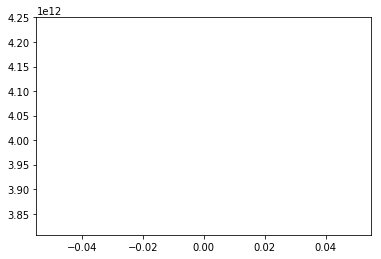

In [110]:
import pandas as pd
import numpy as np
from numpy import *
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt  
  
  
  
#  
#        批量梯度下降  
#  
def gradientDescent(x,y,theta,alpha,iters): #alpha = 学习速率  ，iters = 迭代次数  
    temp = np.matrix(np.zeros(theta.shape))  
    print(temp)  
    parameters = int(theta.ravel().shape[1])  # ravel就是合并矩阵  
    print(parameters)  
    cost = np.zeros(iters)  
    itersNum=[]
    cost100=[]
    for i in range(iters):  
        error = (x * theta.T) - y  
        for j in range(parameters):  
            term = np.multiply(error,x[:,j])      #multiply 对应元素乘法  
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))  
        theta = temp  
        cost[i] = computeCost(x,y,theta)
        if i%10000==0:
            cost100.append(cost[i])
            itersNum.append(i)
    return theta,cost,itersNum,cost100  





boston=load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names) 
data['price']=boston.target #添加y轴  
data.insert(0,'ones',1)    #添加一列 就是在第一列（0） 添加名字为 ones 的一列数据，他的数值都是 1      #偏置数值x0 = 1 ！！！

 
# data.plot(kind = 'scatter' , x = 'population' , y = 'profit' )    #  设置画板类型,figsize是画板大小  
# plt.show()  
  
def computeCost(x,y,theta):   #初始化单变量线性回归  
    inner = np.power(((x*theta.T) - y),2)     #power(x,2)  , 就是将x数组里面的元素都2次方  
    return np.sum(inner) / (2*len(x)) 

#初始化变量  
cols = data.shape[1]  
x = data.iloc[:,0:cols - 1]    #x是所有的行 ， 去掉最后一列  
y = data.iloc[:,cols - 1:cols]   # y就是最后一列数据  
  
  
#初始化数据traning数据  
x = np.matrix(x.values)   #转化成 矩阵形式  
y = np.matrix(y)  
theta = np.matrix(np.ones(cols - 1)) #theta 初始化  
costFunction = computeCost(x,y,theta)  
print(costFunction) 
  
#初始化数据  
alpha = 0.01  
iters = 50000  
gradientDescent(x,y,theta,alpha,iters)  
g,cost,num,cost10 = gradientDescent(x,y,theta,alpha,iters)  
print(num)
print(cost10)
print(computeCost(x,y,g)) 
plt.plot(num,cost10)
plt.show()


#绘制拟合曲线  
# x = np.linspace(data.population.min(),data.population.max(),100)  #llinspace(start,stop,num) num就是生成的样本数  
# f = g[0,0] + (g[0,1] * x)   #g[0,0] 代表theta0 , g[0,1] 代表theta1  
# fig,ax = plt.subplots()  
# ax.plot(x,f,'r',label = 'prediction')  
# ax.scatter(data.population,data.profit,label = 'training data')  
# ax.legend(loc=2)  
# ax.set_xlabel('population')  
# ax.set_ylabel('profit')  
# plt.show() 

In [2]:
rows=open("data/datingTestSet2.txt",3)
row
print(rows)

TypeError: open() argument 2 must be str, not int